<a href="https://colab.research.google.com/github/aref9069/Satellite-Image-Classification/blob/main/Satellite_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.26
!pip install matplotlib==3.9.2
!pip install skillsnetwork

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.0 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.0 which is incompatible.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
music21 9.9.1 requires numpy>=1.26.4, but you have numpy 1.26.0 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.0 which is incompatible.
opencv-contrib-python 4.13.0.92 requires numpy>=2; python_version >= "3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
music21 9.9.1 requires numpy>=1.26.4, but you have numpy 1.26.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.3 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork

from PIL import Image

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/5vTzHBmQUaRNJQe5szCyKw/images-dataSAT.tar"

extraction_path = "."
await skillsnetwork.prepare(url = url, path = extraction_path, overwrite = True)

  0%|          | 0/6003 [00:00<?, ?it/s]

Saved to '.'


In [ ]:
# Define directories
extract_dir = "."

base_dir = os.path.join(extract_dir, 'images_dataSAT')
dir_non_agri = os.path.join(base_dir, 'class_0_non_agri')
dir_agri = os.path.join(base_dir, 'class_1_agri')


non_agri = os.scandir(dir_non_agri)
# print first 5 file paths
for f_path in range(5):
    print(next(non_agri))

<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_22491.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UPE_20250427T170513.SAFE_26928.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UPE_20250427T170513.SAFE_15498.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_19555.jpg'>
<DirEntry 'tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_17741.jpg'>


array([[[109, 144, 120],
        [113, 147, 123],
        [103, 134, 116],
        ...,
        [ 33,  65,  18],
        [ 35,  67,  20],
        [ 36,  68,  21]],

       [[ 56,  89,  68],
        [ 82, 115,  94],
        [ 89, 118, 100],
        ...,
        [ 33,  65,  18],
        [ 34,  66,  19],
        [ 35,  67,  20]],

       [[ 23,  54,  36],
        [ 45,  74,  56],
        [ 48,  72,  56],
        ...,
        [ 35,  66,  22],
        [ 36,  67,  23],
        [ 37,  68,  24]],

       ...,

       [[ 24,  57,  26],
        [ 26,  59,  28],
        [ 28,  59,  28],
        ...,
        [ 53,  66,  56],
        [ 74,  87,  77],
        [ 80,  93,  83]],

       [[ 40,  75,  42],
        [ 42,  77,  44],
        [ 42,  76,  43],
        ...,
        [ 65,  76,  68],
        [ 66,  77,  69],
        [ 66,  77,  69]],

       [[ 42,  77,  44],
        [ 43,  78,  45],
        [ 42,  76,  43],
        ...,
        [104, 115, 107],
        [ 81,  92,  84],
        [ 64,  75,  67]]], dtype=uint8)
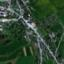

In [ ]:

file_name = next(non_agri)
file_name

os.path.isfile(file_name)


image_name = str(file_name).split("'")[1]
image_name

image_data = plt.imread(os.path.join(dir_non_agri, image_name))
image_data

(64, 64, 3)


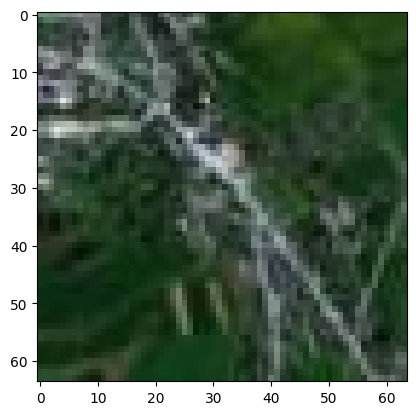

In [ ]:
## You can use this cell to type the code to answer the question.

image_dim= image_data.shape
print(image_dim)
plt.imshow(image_data)

In [ ]:
%%time

non_agri_images = []
for file_name in non_agri:
    if os.path.isfile(file_name):
        image_name = str(file_name).split("'")[1]
        image_data = plt.imread(os.path.join(dir_non_agri, image_name))
        non_agri_images.append(image_data)

non_agri_images = np.array(non_agri_images)

CPU times: user 758 ms, sys: 118 ms, total: 876 ms
Wall time: 877 ms


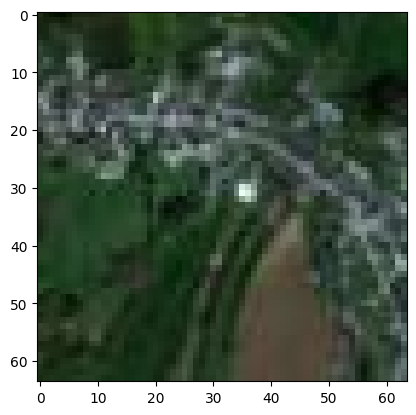

In [ ]:
non_agri_images = os.listdir(dir_non_agri)


image_data = Image.open(os.path.join(dir_non_agri, non_agri_images[0]))
plt.imshow(image_data)

tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_22491.jpg


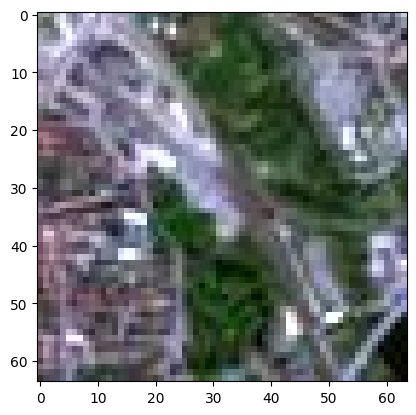

tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UPE_20250427T170513.SAFE_26928.jpg


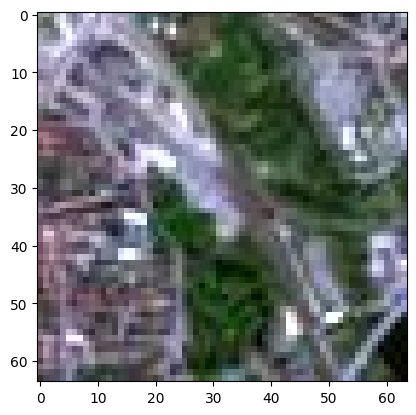

tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UPE_20250427T170513.SAFE_15498.jpg


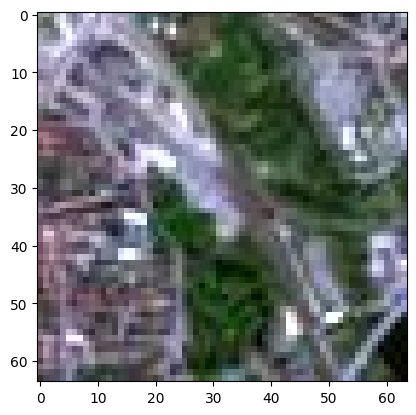

tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_19555.jpg


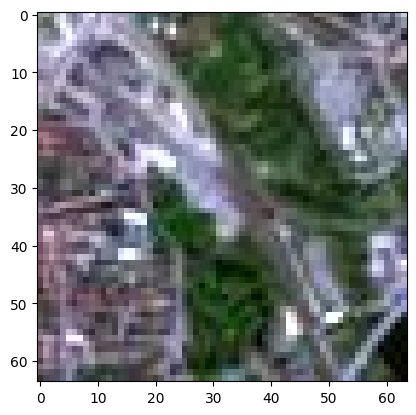

In [ ]:
## Display the first four images in './images_dataSAT/class_0_non_agri/' directory.


n_images= 4
for image in non_agri_images[:n_images]:
    print(image)

    image_path = os.path.join(dir_non_agri, image_name)
    image_data = Image.open(image_path)
    plt.imshow(image_data)
    plt.show()

In [ ]:
## Save the paths to all the images in the dir_agri directory in a list called agri_images_paths.


agri_image_paths=[]
for image in os.listdir(dir_agri):
    agri_image_paths.append(os.path.join(dir_agri, image))

agri_image_paths.sort()


In [ ]:
## How many images of agricultural land exist in the './images_dataSAT/class_1_agri/' directory
print(len(agri_image_paths))

agri_images = os.listdir(dir_agri)

3000


tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_4367.jpg


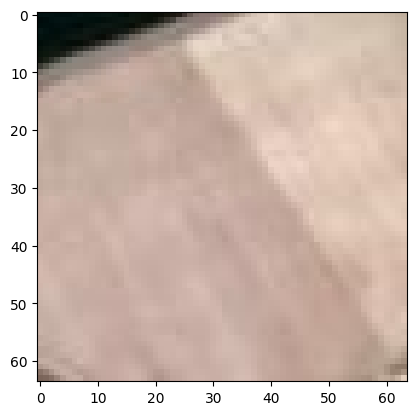

tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UPE_20250427T170513.SAFE_24159.jpg


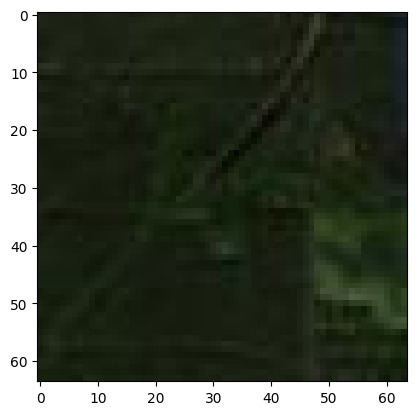

tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_0994.jpg


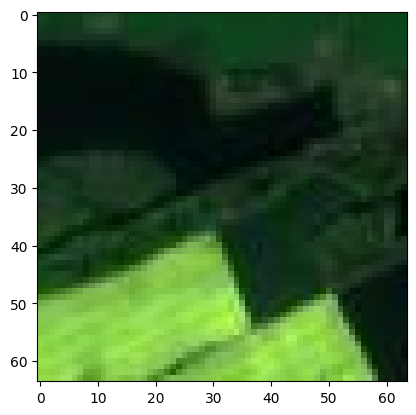

tile_S2A_MSIL2A_20250427T101701_N0511_R065_T32UQB_20250427T170513.SAFE_2385.jpg


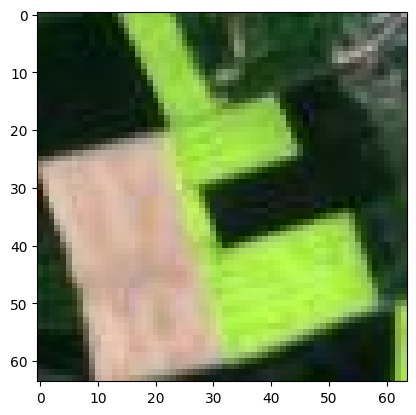

In [ ]:
n_agri_images= 4

for image in agri_images[:n_images]:
  print(image)
  image_agri_path=os.path.join(dir_agri, image)
  image_agri_data=Image.open(image_agri_path)
  plt.imshow(image_agri_data)
  plt.show()

